# Importing the required libraries

In [13]:
# Importing numpy for numerical operations
import numpy as np

# Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing keras library for creating Convolution Neural Network(CNN)
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Metrics to measure the classification accuracy, precision, recall
from sklearn.metrics import classification_report,confusion_matrix

# importing libraries for image visualization
import cv2
import PIL

# libraries for file operations
import os
import pathlib

import warnings
warnings.filterwarnings('ignore')

# Description of datasets used

- Training/Validation dataset: This dataset has 39,375 frames that are resized to 254x254 and the image format is JPG. 
  This data is in a directory called training, which contains 2 sub-directories, one per class.

- Test dataset : Test datset has 8,617 frames that are labeled.This data is in a directory called test, which contains 2 sub-directories, one per class.


- Training/ <br>
      Fire/ 
      No_Fire/ 
    
- Test/ <br>
      Fire/ 
      No_Fire/

# Exploratory data analysis

In [5]:
# The following are the directories containing training and test images
training_data_dir = './ForestFires_Train/Training'
test_data_dir = './ForestFiresTest/Test'

WindowsPath('ForestFires_Train/Training')

In [6]:
training_data_dir = pathlib.Path(training_data_dir)
training_data_dir

total_image_count = len(list(training_data_dir.glob('*/*.jpg')))
print("Total number of images in the training datset : " ,total_image_count)

Total number of images in the training datset :  39375


In [10]:
fire_images = list(training_data_dir.glob('Fire/*'))
fire_img_count = len(fire_images)
print("Total number of  Fire images : " ,fire_img_count)

Total number of  Fire images :  25018


In [11]:
no_fire_images = list(training_data_dir.glob('No_Fire/*'))
no_fire_count = len(no_fire_images)
print("Total number of No_Fire images  : " ,no_fire_count)

Total number of No_Fire images  :  14357


In [8]:
test_data_dir = pathlib.Path(test_data_dir)
total_image_count_test = len(list(test_data_dir.glob('*/*.jpg')))
print("Total number of images in the test datset : " ,total_image_count_test)

Total number of images in the test datset :  8617


# Visualizing Fire and No_fire images

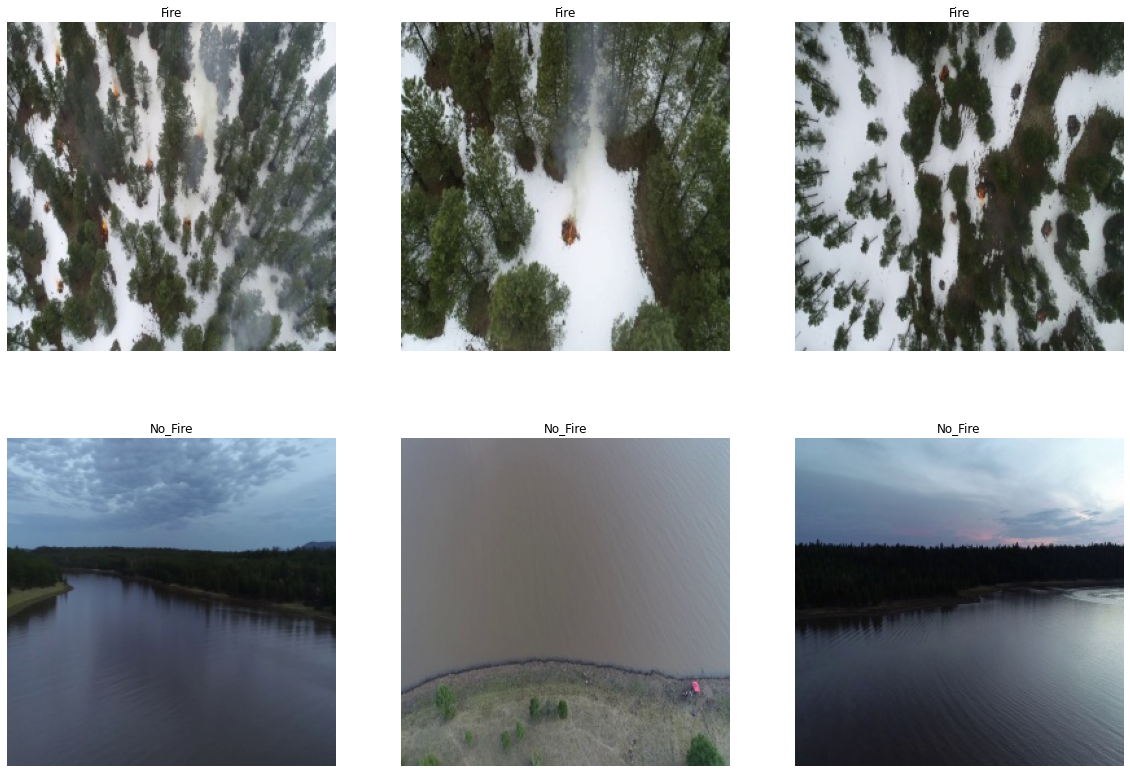

In [21]:
# randomly selecting 3 fire and no-fire iamges
select_Fire = np.random.choice(fire_images, 3, replace = False)
select_No_Fire = np.random.choice(no_fire_images, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (20,14))
for i in range(6):
    if i < 3:
        image = select_Fire[i]
        label = 'Fire'
    else:
        image = select_No_Fire[i-3]
        label = 'No_Fire'
    ax = fig.add_subplot(2, 3, i+1)
    
    img = PIL.Image.open(image)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()

# Shape of the Image

In [25]:
# Using Opencv imread function to read the image in RGB format
fire_img = cv2.imread(str(fire_images[0]))[...,::-1]
print("Dimensions of the fire_image : ",np.shape(img))
image = cv2.imread(str(no_fire_images[0]))[...,::-1]
print("Dimensions of the no_fire_image : ",np.shape(image))

Dimensions of the fire_image :  (254, 254, 3)
Dimensions of the no_fire_image :  (254, 254, 3)


Observations: 

- Images are 3- dimensional arrays of integers from 0 to 255 and, of size: width* height * 3. <br>
- The three represents three color channels Red, Green, Blue.

# Visualizing disribution of colors (R,G,B) in fire image

In [41]:
img.ravel()

array([24, 25, 19, ..., 64, 62, 63], dtype=uint8)

Text(0, 0.5, 'Number of Pixels')

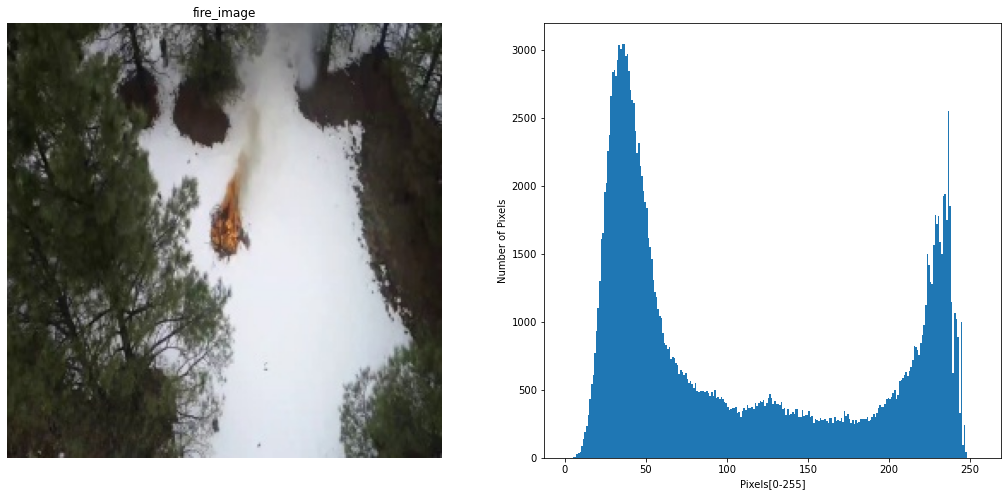

In [99]:
fire_img = cv2.imread(str(fire_images[0]))[...,::-1]
plt.figure(figsize=(18,8))

plt.subplot(121)
plt.imshow(fire_img)
plt.title('fire_image')
plt.axis('off')

plt.subplot(122)
plt.hist(fire_img.ravel(),256,[0,256]) # plotting histogram of image with flattend image array, number of bins=256, range : 0 to 256
plt.xlabel('Pixels[0-255]')
plt.ylabel('Number of Pixels')
            

# Visualizing disribution of colors (R,G,B) in no_fire image

Text(0, 0.5, 'Number of Pixels')

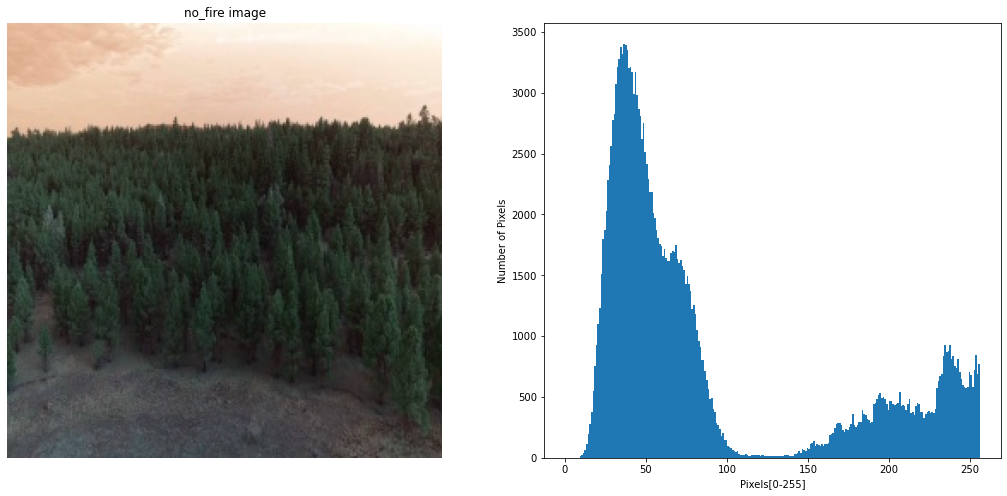

In [100]:
no_fire_img = cv2.imread(str(no_fire_images[4]))

plt.figure(figsize=(18,8))

plt.subplot(121)
plt.imshow(no_fire_img)
plt.title('no_fire image')
plt.axis('off')

plt.subplot(122)
plt.hist(no_fire_img.ravel(),256,[0,256]) # plotting histogram of image with flattend image array, number of bins=256, range : 0 to 256
plt.xlabel('Pixels[0-255]')
plt.ylabel('Number of Pixels')
                      

# Distributions of colors in Fire vs No-Fire images

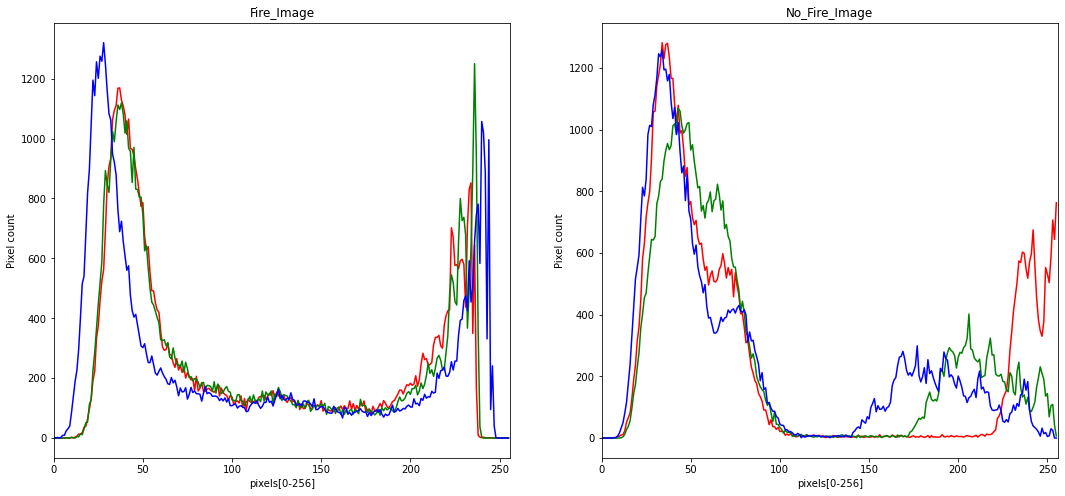

In [97]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

plt.figure(figsize=(18,8))

color = ('r','g','b')
plt.subplot(121)
for i,color in enumerate(color):
    histo = cv2.calcHist([fire_img], [i], None, [256],[0,256]) #cv2.calcHist(images, channels, mask, histSize, ranges[])
    plt.plot(histo,color=color)
    plt.xlim([0,256])
    plt.title('Fire_Image')
    plt.xlabel('pixels[0-256]')
    plt.ylabel('Pixel count')
    
plt.subplot(122)
color = ('r','g','b')
for i,color in enumerate(color):
    histo = cv2.calcHist([no_fire_img], [i], None, [256],[0,256])
    plt.plot(histo,color=color)
    plt.xlim([0,256])
    plt.title('No_Fire_Image')
    plt.xlabel('pixels[0-256]')
    plt.ylabel('Pixel count')
    

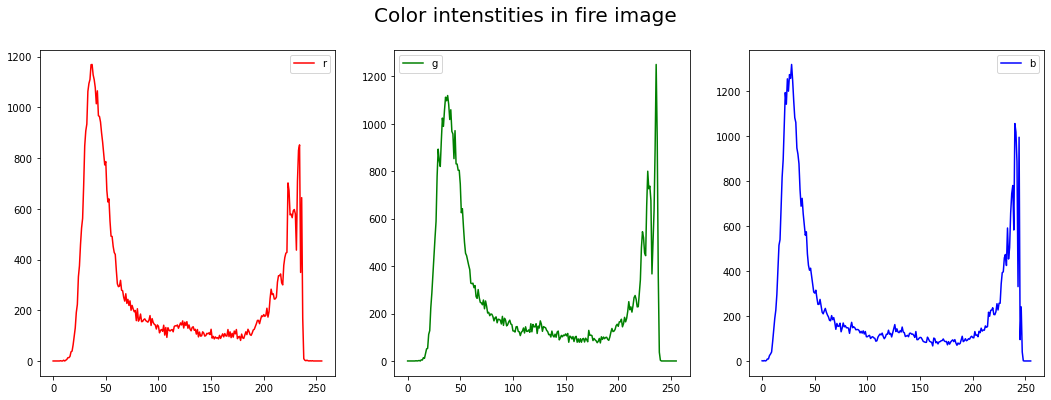

In [94]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Color intenstities in fire image',fontsize=20)
plt.subplot(131)
histg = cv2.calcHist([fire_img],[0],None,[256],[0,256])  # 0 for red
plt.plot(histg,color='red')
plt.legend('red')
plt.subplot(132)
histg = cv2.calcHist([fire_img],[1],None,[256],[0,256])  # 1 for green
plt.plot(histg,color='green')
plt.legend('green')
plt.subplot(133)
histg = cv2.calcHist([fire_img],[2],None,[256],[0,256])  # 2 for blue
plt.plot(histg,color='blue')
plt.legend('blue')
plt.show()

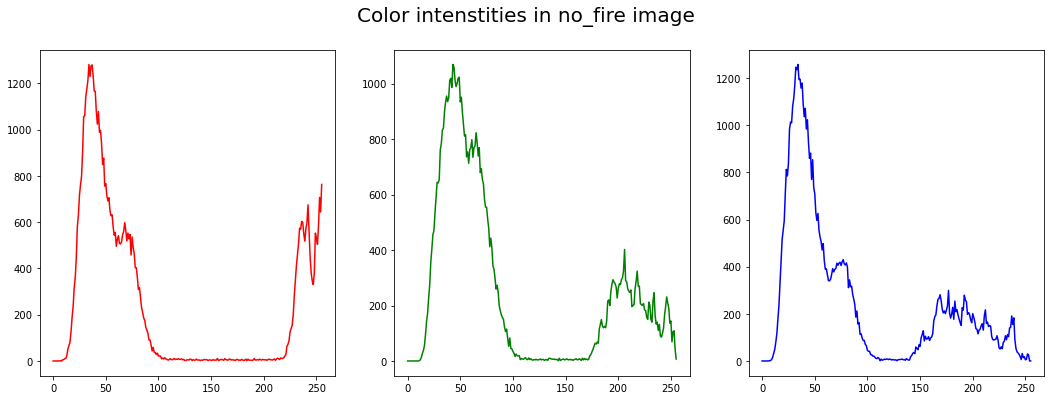

In [98]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Color intenstities in no_fire image',fontsize=20)
plt.subplot(131)
histg = cv2.calcHist([no_fire_img],[0],None,[256],[0,256])  # 0 for red
plt.plot(histg,color='red')
plt.subplot(132)
histg = cv2.calcHist([no_fire_img],[1],None,[256],[0,256])  # 1 for green
plt.plot(histg,color='green')
plt.subplot(133)
histg = cv2.calcHist([no_fire_img],[2],None,[256],[0,256])  # 2 for blue
plt.plot(histg,color='blue')

Observations :
<br>
- Fire image visualized has large number of trees, big patch of snow along with the fire. The Red, Green and Blue color
histograms showed higher intensities and similar distribution.
               
- Incase of no_fire image visualized, as the image contains red shades in sky due to sunset, the Red intensity is also high,along with green and blue.   

- As a result, there are chances that models built for classifying images based on color intensities ,may classify these non-fire images into fire images, as the intensity of RED color is high in such images and incase of fire images where there is very low fire and presence of high volume of snow and trees, there are chances the image may get classified as no_fire image due to low intensity of RED color.

# Building Image Classification Model

## step1 : Loading the data using a function called get_data and labelling each image

In [102]:
labels = ["Fire" , "No_Fire"]
img_size = 254

def get_data(data_dir):
    data = []
    
    for label in labels:
       # print(label)
        path = os.path.join(data_dir, label) # Joining the directory path with label into a variable called path.
       # print(path)
        class_num = labels.index(label) # class number will be the index of the label.
       # print(class_num)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img))[...,::-1] # read the image in the given directory
                data.append([img_arr, class_num]) # append the image and its corresponding label into a list called data
            except Exception as e:
                print(e)
                
    return np.array(data) # convert data list to numpy array

In [103]:
# Loading training data using get_data function
train = get_data("./ForestFires_Train/Training")
len(train)

<ipython-input-102-59c975d3cb94>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data) # convert data list to numpy array


39375

In [108]:
# Loading test data using get_data function
test = get_data("./ForestFiresTest/Test")
len(test)

<ipython-input-102-59c975d3cb94>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data) # convert data list to numpy array


8617

In [7]:
train[0] # each element of train array contains an image (numpy array) and its corresponding label (0 for fire, 1 for no_fire)

array([array([[[24, 25, 19],
        [23, 24, 18],
        [22, 23, 15],
        ...,
        [79, 84, 77],
        [52, 57, 50],
        [24, 29, 22]],

       [[25, 26, 20],
        [21, 22, 16],
        [21, 22, 14],
        ...,
        [42, 47, 40],
        [60, 65, 58],
        [33, 38, 31]],

       [[23, 24, 18],
        [22, 23, 17],
        [23, 24, 16],
        ...,
        [51, 56, 50],
        [54, 59, 53],
        [64, 69, 63]],

       ...,

       [[22, 17, 11],
        [23, 18, 12],
        [36, 31, 25],
        ...,
        [20, 18, 19],
        [24, 22, 23],
        [42, 40, 41]],

       [[29, 21, 18],
        [29, 21, 18],
        [37, 30, 24],
        ...,
        [22, 20, 21],
        [28, 26, 27],
        [58, 56, 57]],

       [[33, 25, 22],
        [33, 25, 22],
        [38, 31, 25],
        ...,
        [25, 23, 24],
        [29, 27, 28],
        [64, 62, 63]]], dtype=uint8),
       0], dtype=object)

## step:2 Checking for distribution of data in fire and no_fire classes

Text(0.5, 1.0, 'Train dataset: ')

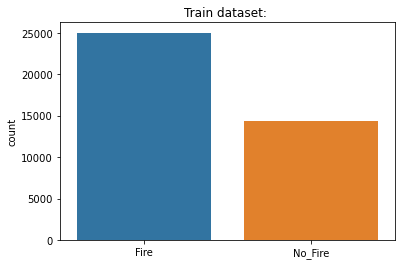

In [104]:
class_count = []
for i in train:
    if(i[1] == 0):
        class_count.append("Fire")
    else:
        class_count.append("No_Fire")

plt.figure(figsize=(6,4))
sns.countplot(class_count)
plt.title("Train dataset: ")

Text(0.5, 1.0, 'Test dataset: ')

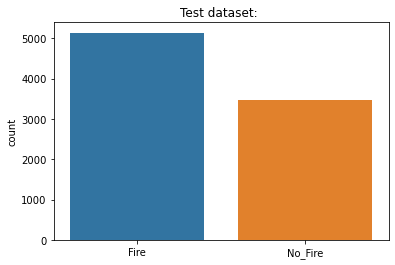

In [10]:
l = []
for i in test:
    if(i[1] == 0):
        l.append("Fire")
    else:
        l.append("No_Fire")
    
plt.figure(figsize=(6,4))
sns.countplot(l)
plt.title("Test dataset: ")

In Training dataset:
- Percentage of images in Fire class :   63.54
- Percentage of images in No_Fire class: 36.46
    
- This is a moderately balanced dataset.

Text(0.5, 1.0, 'no_fire')

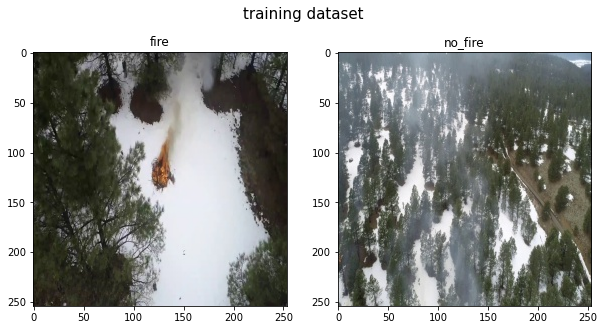

In [105]:
fig = plt.figure(figsize = (10,5))
fig.suptitle('training dataset',fontsize=15)
plt.subplot(121)
plt.imshow(train[0][0])
plt.title(labels[0])
plt.title('fire')

plt.subplot(122)
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])
plt.title('no_fire')

# Data Preprocessing and Data Augmentation

In [13]:
train[0][0].shape

(254, 254, 3)

In [109]:
X = [] # list to store all the images in training data
y = [] # list to store labels of training images

for image, label in train:
    X.append(image)
    y.append(label)  

In [110]:
X_test = [] # list to store all the images in test data

y_test = [] # list to store labels of test images


for image, label in test:
    X_test.append(image)
    y_test.append(label)

In [16]:
print("length of X : ", len(X))
print("length of y : ", len(y))

length of X :  39375
length of y :  39375


In [111]:
# Splitting 65% of data for training and 35% of data for validation

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101,shuffle=True)

In [60]:
len(x_train)
len(x_val)

13782

In [ ]:
# training the images using 1500 images from training data : 1200 for training and 300 for validation

In [113]:
x_t = np.array(x_train[:1200])
y_t = np.array(y_train[:1200])


In [112]:
x_v = np.array(x_val[:300])
y_v = np.array(y_val[:300])

In [63]:
x_v.shape

(300, 254, 254, 3)

In [114]:
# Normalize the data
x_training = np.array(x_t) / 255
x_validation = np.array(x_v) / 255

x_training.reshape(-1, img_size, img_size, 1)
y_training= np.array(y_t)

x_validation.reshape(-1, img_size, img_size, 1)
y_validation = np.array(y_v)

# X_test.reshape(-1, img_size, img_size, 1)
# y_test = np.array(y_test)

In [70]:
x_training.shape

(1200, 254, 254, 3)

### Data augmentation on the training data:

In [71]:
datagen = ImageDataGenerator(
         # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_training)

## Defining the model 

Defining a  simple CNN model with 3 convolutional layers followed by a max-pooling layers. <br>
A dropout layer is added after 3rd maxpool operation to avoid overfitting.


In [72]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(254,254,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 127, 127, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)       

## compile the model

Compiling the model using Adam as optimizer and SparseCategoricalCroosentropy as the loss function. <br>
Using a lower learning rate 0.000001 for a smoother curve.

In [73]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
## Training the model for 100 epochs.

In [75]:
history = model.fit(x_training,y_training,epochs = 100 , validation_data = (x_validation, y_validation))

Epoch 1/100
38/38 [==============================] - 99s 1s/step - loss: 0.6138 - accuracy: 0.6460 - val_loss: 0.5691 - val_accuracy: 0.6433
Epoch 2/100
38/38 [==============================] - 51s 1s/step - loss: 0.5517 - accuracy: 0.6461 - val_loss: 0.5459 - val_accuracy: 0.6433
Epoch 3/100
38/38 [==============================] - 51s 1s/step - loss: 0.5338 - accuracy: 0.6457 - val_loss: 0.5201 - val_accuracy: 0.6800
Epoch 4/100
38/38 [==============================] - 51s 1s/step - loss: 0.4991 - accuracy: 0.7167 - val_loss: 0.4954 - val_accuracy: 0.7467
Epoch 5/100
38/38 [==============================] - 51s 1s/step - loss: 0.4890 - accuracy: 0.7639 - val_loss: 0.4718 - val_accuracy: 0.7767
Epoch 6/100
38/38 [==============================] - 51s 1s/step - loss: 0.4599 - accuracy: 0.7971 - val_loss: 0.4476 - val_accuracy: 0.7967
Epoch 7/100
38/38 [==============================] - 51s 1s/step - loss: 0.4361 - accuracy: 0.8149 - val_loss: 0.4265 - val_accuracy: 0.8100
Epoch 8/100
3

Epoch 59/100
38/38 [==============================] - 55s 1s/step - loss: 0.1677 - accuracy: 0.9479 - val_loss: 0.2165 - val_accuracy: 0.9233
Epoch 60/100
38/38 [==============================] - 57s 1s/step - loss: 0.1718 - accuracy: 0.9570 - val_loss: 0.2166 - val_accuracy: 0.9267
Epoch 61/100
38/38 [==============================] - 54s 1s/step - loss: 0.1523 - accuracy: 0.9581 - val_loss: 0.2109 - val_accuracy: 0.9233
Epoch 62/100
38/38 [==============================] - 60s 2s/step - loss: 0.1532 - accuracy: 0.9558 - val_loss: 0.2123 - val_accuracy: 0.9233
Epoch 63/100
38/38 [==============================] - 58s 2s/step - loss: 0.1541 - accuracy: 0.9581 - val_loss: 0.2115 - val_accuracy: 0.9267
Epoch 64/100
38/38 [==============================] - 53s 1s/step - loss: 0.1547 - accuracy: 0.9493 - val_loss: 0.2133 - val_accuracy: 0.9300
Epoch 65/100
38/38 [==============================] - 52s 1s/step - loss: 0.1499 - accuracy: 0.9588 - val_loss: 0.2071 - val_accuracy: 0.9233
Epoch 

# Evaluating the results

Plotting training and validation accuracy along with training and validation loss.

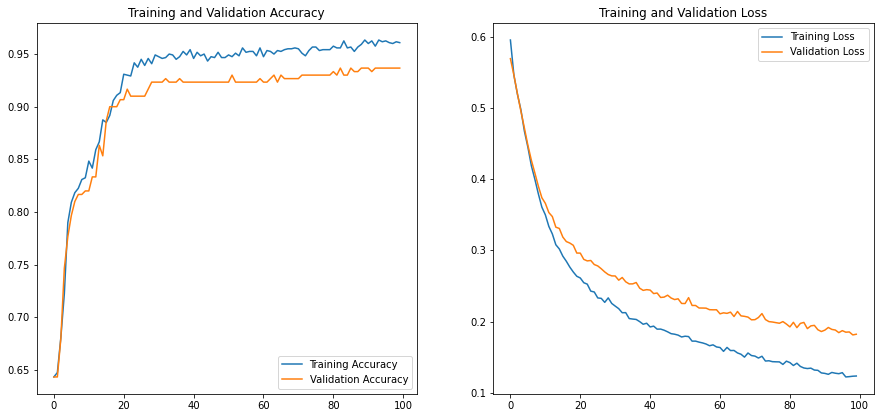

In [76]:
  
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']    
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Printing classification report to see precision, recall, accuracy

In [78]:
predictions = model.predict_classes(x_validation)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_v, predictions, target_names = ['Fire (Class 0)','No_Fire (Class 1)']))

                   precision    recall  f1-score   support

   Fire (Class 0)       0.91      0.99      0.95       193
No_Fire (Class 1)       0.99      0.83      0.90       107

         accuracy                           0.94       300
        macro avg       0.95      0.91      0.93       300
     weighted avg       0.94      0.94      0.94       300



In [77]:
predictions = model.predict_classes(x_validation)
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], d

Confusion Matrix: 
 [[192   1]
 [ 18  89]]


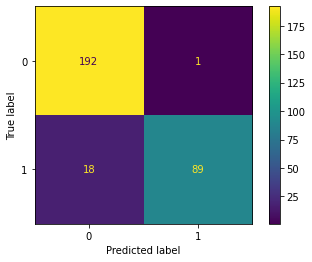

In [80]:
## printing confusion matrix 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm_dt = confusion_matrix(y_validation, predictions)
print("Confusion Matrix: \n",cm_dt)
disp = ConfusionMatrixDisplay(cm_dt)
disp.plot()


In [82]:
[tn_dt, fp_dt, fn_dt, tp_dt] = cm_dt.ravel()

In [83]:
import pandas as pd
df = pd.DataFrame({
              'CNN' :     [tn_dt, fp_dt, fn_dt, tp_dt]
                },
             index=['True Negatives','False Positives','False Negatives','True Positives'])


df

,CNN
True Negatives,192
False Positives,1
False Negatives,18
True Positives,89


In [216]:
count = 0
print("0 is fire and 1 is no_fire \n ")
print("actual, predicted :")
for i,j,k in zip(y_validation,predictions,x_validation):
    if i != j:
        print(i,"      ",j)
        count += 1
print("Total number of times the CNN made mistakes in predictions : ",count)

0 is fire and 1 is no_fire 
 
actual, predicted :
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
1        0
0        1
1        0
1        0
1        0
1        0
1        0
Total number of times the CNN made mistakes in predictions :  19


In [194]:
np.where(y_validation!=predictions) # Indexes where truth is not equal to prediction

(array([ 15,  20,  33,  36,  56,  58,  90, 101, 106, 130, 133, 152, 198,
        211, 233, 255, 256, 273, 278], dtype=int64),)

In [196]:
wrong_preds = x_validation[[ 15,  20,  33,  36,  56,  58,  90, 101, 106, 130, 133, 152, 198,
        211, 233, 255, 256, 273, 278]]

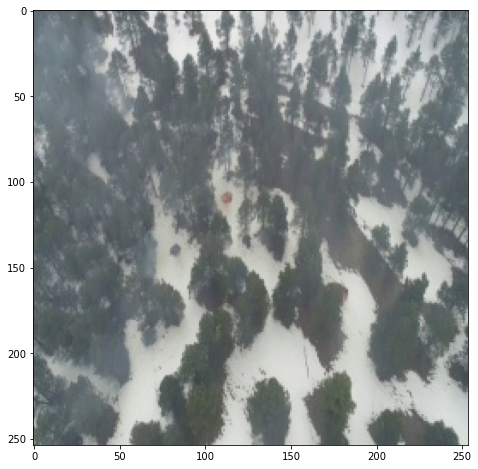

In [115]:
plt.figure(figsize=(10,8))
plt.imshow(x_validation[211])

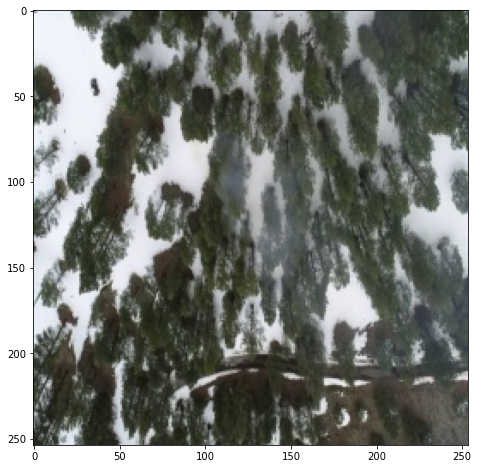

In [202]:
plt.figure(figsize=(10,8))
plt.imshow(x_validation[278])

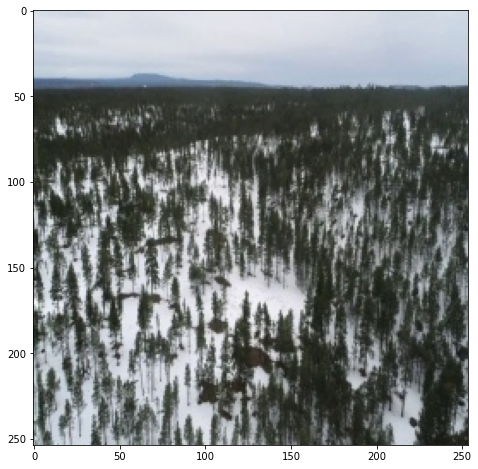

In [207]:
plt.figure(figsize=(10,8))
plt.imshow(x_validation[15])

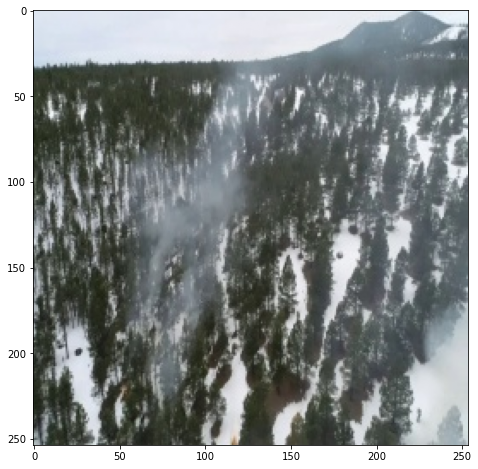

In [208]:
plt.figure(figsize=(10,8))
plt.imshow(x_validation[58])

In [ ]:
O